In [38]:
import pickle
import json
import os
import utils

import pandas as pd

In [39]:
dir = 'output/throughput_test/'

# Construct a list of the rows (i.e. dicts) to be added in the dataframe
df_rows_list = []
run_num=1
cur_runtime = 0
for run in sorted(os.listdir(dir)):
    run_path = dir+run+'/'

    if run == 'single_source':
        break

    with open(run_path+'info.json') as f:
        info_dict = json.load(f)

    row_dict = {}
    row_dict['run'] = run_num
    row_dict['total_elapsed_time'] = info_dict['ppr_using_pf']['runtime'] + cur_runtime
    df_rows_list.append(row_dict)

    run_num += 1
    cur_runtime = row_dict['total_elapsed_time']

# Populate the DataFrame
df = pd.DataFrame(df_rows_list)
df.head()

,run,total_elapsed_time
0,1,2.716749
1,2,5.532179
2,3,7.551927
3,4,10.333370
4,5,13.380828


In [40]:
runtime_single_source = 96.12

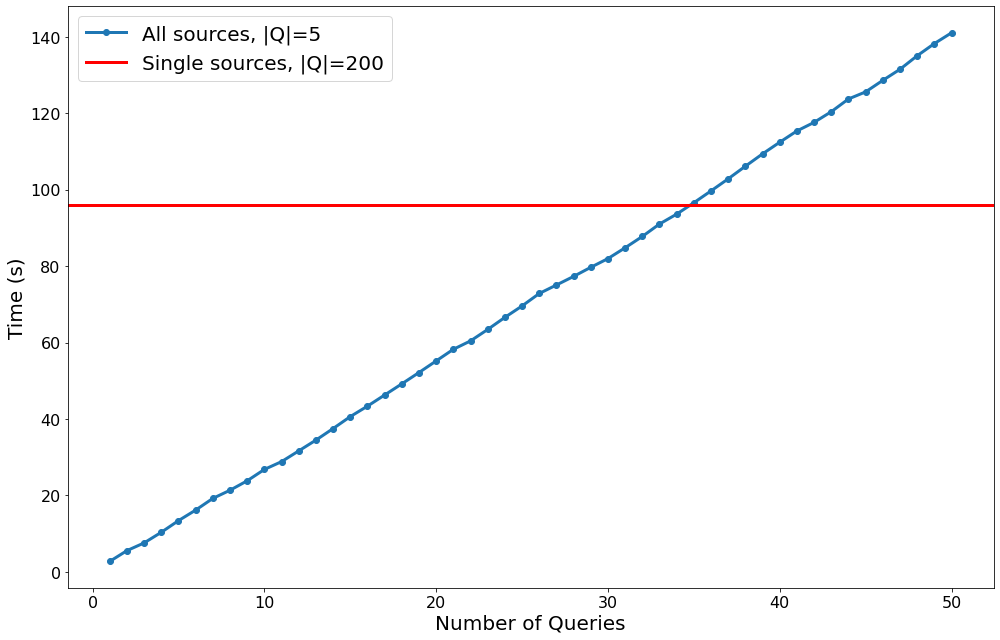

In [41]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14,9))

plt.plot(df['run'].values, df['total_elapsed_time'].values, label='All sources, |Q|=5', marker='.', linewidth=3, markersize=12)
plt.axhline(y=runtime_single_source, label='Single sources, |Q|=200', c='r', linewidth=3)

plt.legend(fontsize=20)
plt.xlabel('Number of Queries', fontsize=20)
plt.ylabel('Time (s)', fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.tight_layout()
plt.savefig('figures/throughput.pdf')
plt.savefig('figures/throughput.png', dpi=300)